# Diluted Unitary Probability Fitting

In [43]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from loss_functions import ProbabilityMSE, ProbabilityRValue
from optimization import ModelQuantumMap, Logger
from quantum_channel import channel_fidelity
from kraus_channels import DilutedKrausMap, KrausMap
from quantum_tools import generate_unitary, circuit_to_matrix
from spectrum import channel_spectrum
from quantum_circuits import pqc_basic
from utils import loader

np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Four Qubits, Repetition

In [56]:
n = 4
d = 2**n

path1 = "../../../data/"
path2 = "data/"

[model1, model2, model3, model4, model5] = loader(path1 + "belem_4qubit_repeated.model")

spectrum1 = channel_spectrum(model1.channel, keep_unity=False)
spectrum2 = channel_spectrum(model2.channel, keep_unity=False) 
spectrum3 = channel_spectrum(model3.channel, keep_unity=False)
spectrum4 = channel_spectrum(model4.channel, keep_unity=False)

In [57]:
inputs, targets, _, _ = loader(path1 + "belem_4qubits_8layers_fixTopology0")

In [58]:
np.random.seed(42)

circuit_target = pqc_basic(n, 8)

#U = circuit_to_matrix(circuit_target)
U = generate_unitary(d)
np.random.seed(42)
tf.random.set_seed(42)

diluted_unitary = DilutedKrausMap(U = U, 
                                  c = 1 - 0.5659543898032584,
                                  kraus_part = KrausMap(d = d,
                                                        rank = 10,
                                                        trainable = False),
                                  spam = model1.channel.spam)

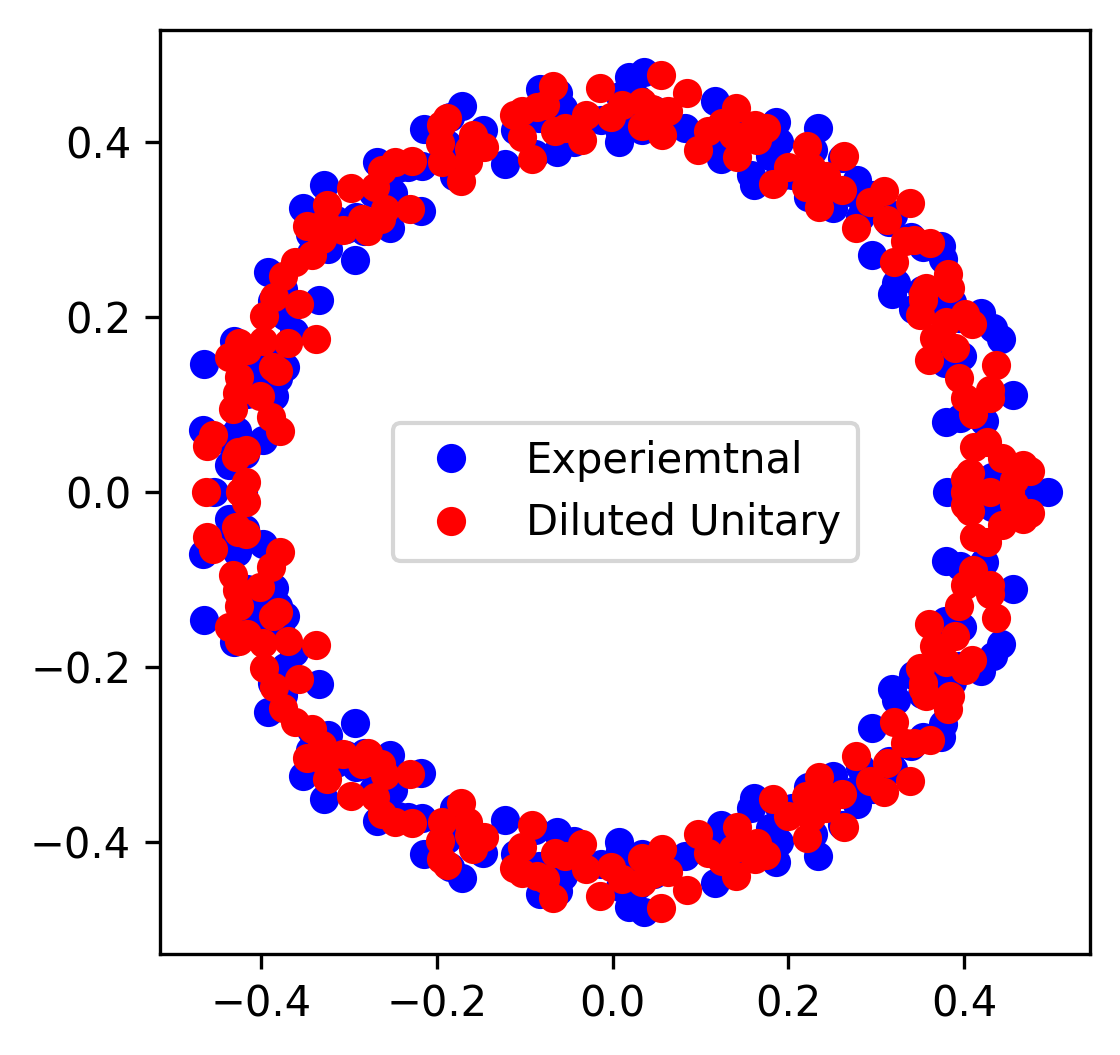

In [59]:
model = ModelQuantumMap(channel =diluted_unitary,
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),))

spectrum_model = channel_spectrum(model.channel, keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experiemtnal", "Diluted Unitary"])
plt.show()

In [60]:
channel_fidelity(model1.channel, model.channel)

<tf.Tensor: shape=(), dtype=float64, numpy=0.024868461569774708>

In [61]:
model.train(inputs = inputs, 
            targets = targets,
            inputs_val = inputs,
            targets_val = targets, 
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.3724808498488254 -0.6781179227140326
0.29949958055871195 -0.35862157603926614
0.28568447332137537 -0.29664412655036476
0.27801836343266184 -0.2812705676646494
0.2847935571350805 -0.27630501220577397
0.27849994039225556 -0.2745171918098015
0.27777693756682814 -0.2738275146506097
0.28187586950595617 -0.2735401134619577
0.2895888251242436 -0.27342711276773013
0.28290936174261844 -0.2733768277077482
0.28084620501066565 -0.27336524394056116


In [62]:
channel_fidelity(model1.channel, model.channel)

<tf.Tensor: shape=(), dtype=float64, numpy=0.030032094835427004>

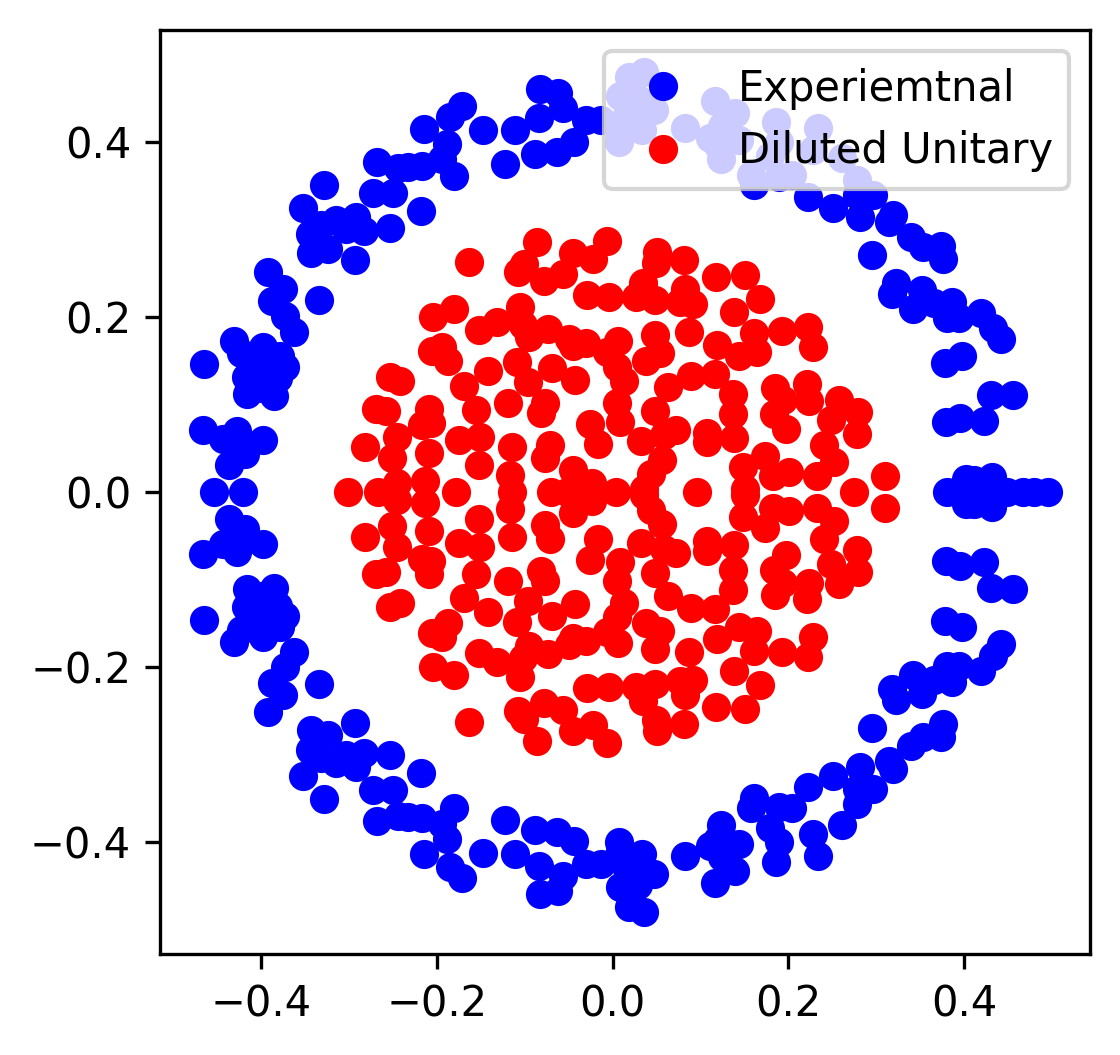

In [63]:
model = ModelQuantumMap(channel =diluted_unitary,
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),))

spectrum_model = channel_spectrum(model.channel, keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experiemtnal", "Diluted Unitary"])
plt.show()


In [64]:
np.random.seed(42)

circuit_target = pqc_basic(n, 8)

U = circuit_to_matrix(circuit_target)
np.random.seed(42)
tf.random.set_seed(42)

diluted_unitary = DilutedKrausMap(U = U, 
                                  c = 1 - 0.5659543898032584,
                                  kraus_part = KrausMap(d = d,
                                                        rank = 10,
                                                        trainable = False),
                                  spam = model1.channel.spam)

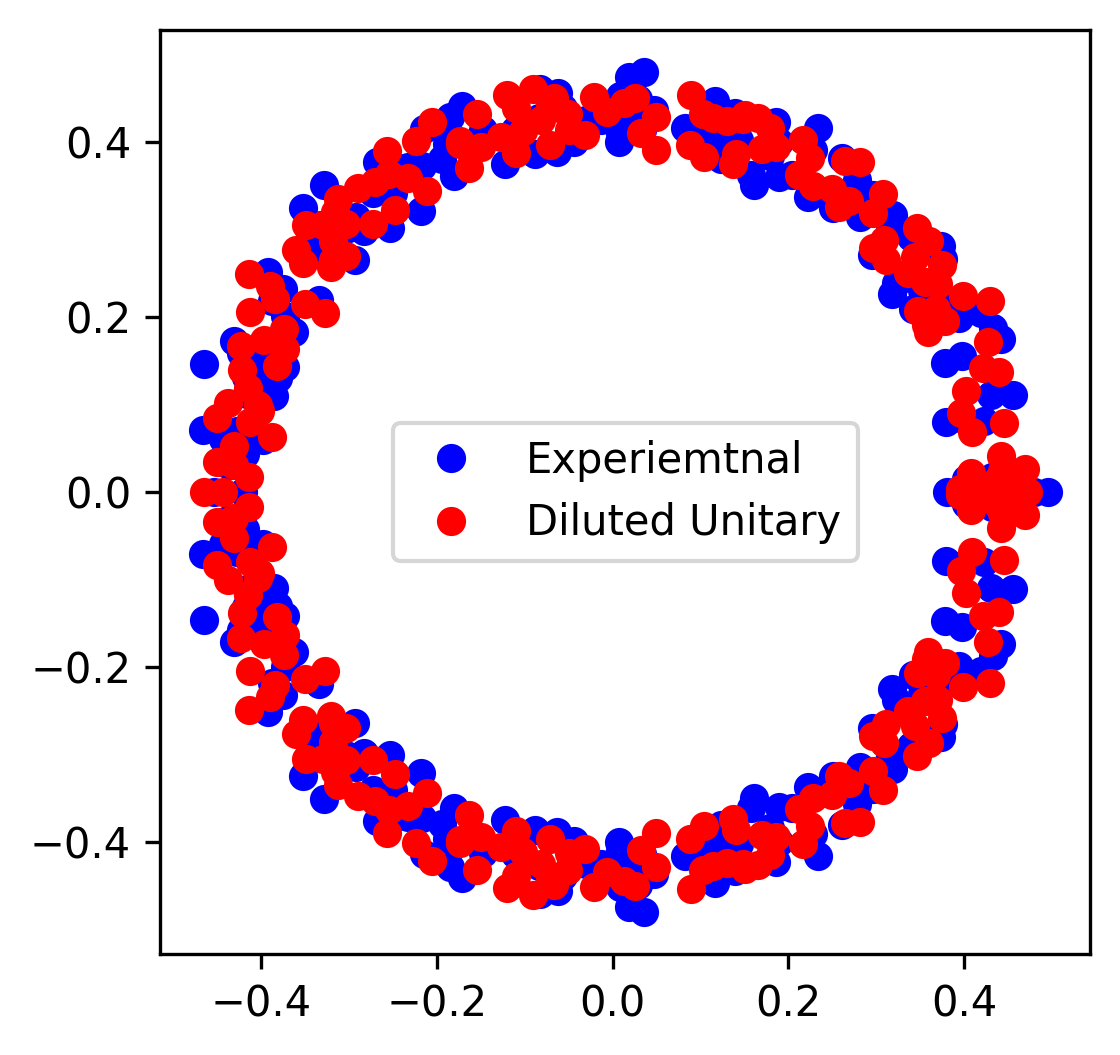

In [65]:
model = ModelQuantumMap(channel =diluted_unitary,
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),))

spectrum_model = channel_spectrum(model.channel, keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experiemtnal", "Diluted Unitary"])
plt.show()

<tf.Tensor: shape=(), dtype=float64, numpy=0.2670539103117415>

In [67]:
model.train(inputs = inputs, 
            targets = targets,
            inputs_val = inputs,
            targets_val = targets, 
            num_iter = 1000, 
            N = 500, 
            verbose = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

0.09735983952265508 0.5482312846009916
0.09716786002657664 0.558511074326116
0.09808083599839645 0.5584985253657004
0.09787876814402627 0.5585107634105408
0.09608921298544328 0.5585118398977671
0.09496311905675389 0.5584602568519057
0.09800647236084543 0.558507927807744
0.09954572350356126 0.5585053886088188
0.10038983724758335 0.5583968272589229
0.10050727157578712 0.5584857696988428
0.09630394210587731 0.558472018089925


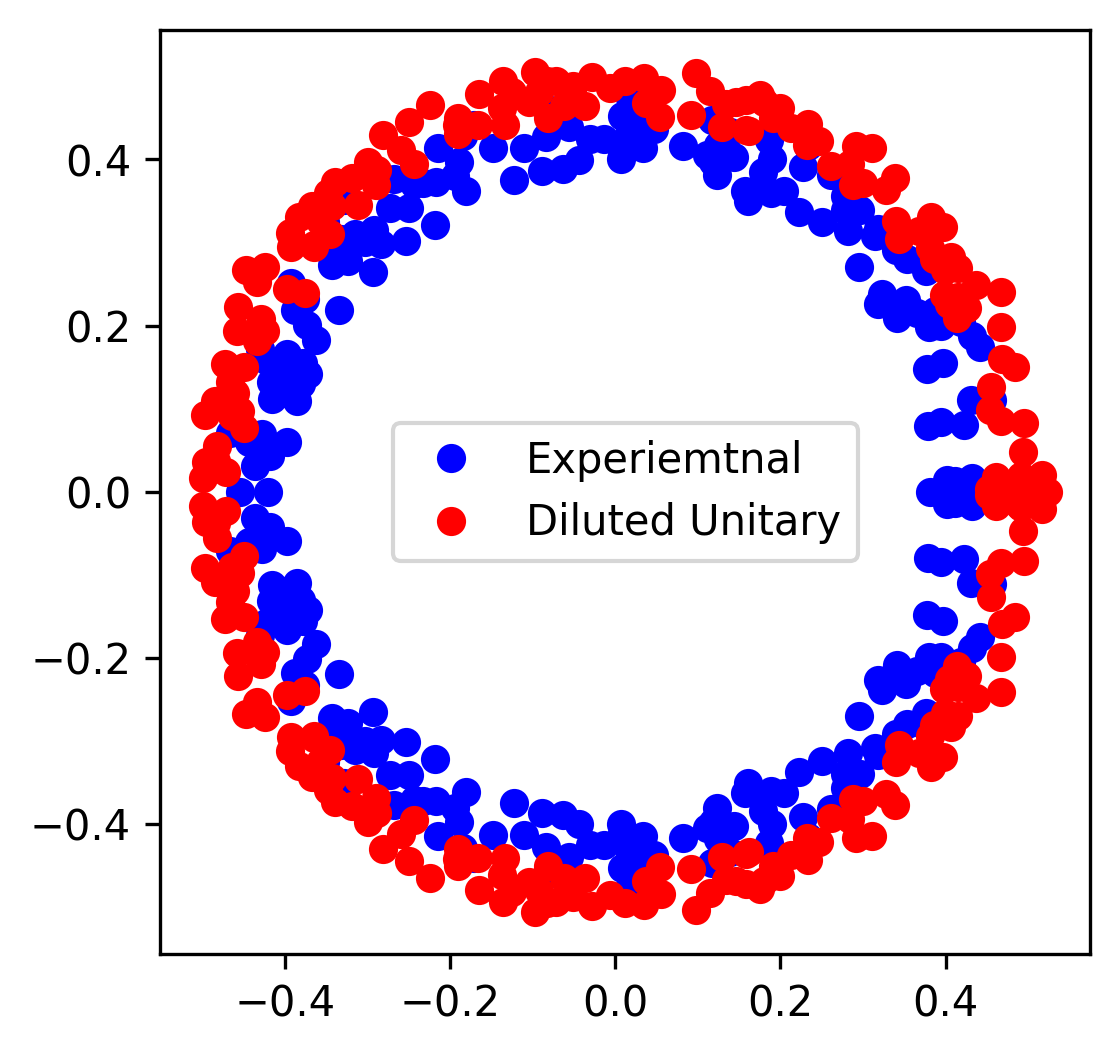

<tf.Tensor: shape=(), dtype=float64, numpy=0.2871045879102614>

In [68]:
model = ModelQuantumMap(channel =diluted_unitary,
                        loss_function = ProbabilityMSE(),
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(loss_function = ProbabilityMSE(),
                                        loss_function_val = ProbabilityRValue(),))

spectrum_model = channel_spectrum(model.channel, keep_unity=False) 

fig = plt.figure(figsize=(4,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum_model[:,0], spectrum_model[:,1], "ro")
plt.legend(["Experiemtnal", "Diluted Unitary"])
plt.show()

channel_fidelity(model1.channel, model.channel)